<a href="https://colab.research.google.com/github/Fatema2525/machine-learning-and-deep-learning-projects/blob/main/CIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c cifar-10

 96% 688M/715M [00:03<00:00, 153MB/s] 
100% 715M/715M [00:03<00:00, 217MB/s]


In [9]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [10]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Dataset is extracted')

Dataset is extracted


In [11]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [12]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.4/494.4 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 14.0 MB/s eta 0:00:00


In [13]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [14]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [16]:
files = os.listdir('/content/train')

In [17]:
len(files)

50000

In [18]:
print(files[0:5])
print(files[-5:])

['5633.png', '28717.png', '4395.png', '37284.png', '43987.png']
['35414.png', '12097.png', '47347.png', '21534.png', '31524.png']


In [19]:
labels = pd.read_csv('/content/trainLabels.csv')

In [20]:
labels.shape

(50000, 2)

In [21]:
labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [22]:
labels[labels['id']==999]

,id,label
998,999,cat


In [23]:
labels['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [24]:
labels['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [25]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels_new = [labels_dictionary[i] for i in labels['label']]

In [26]:
print(labels_new[0:5])
print(labels_new[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


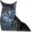

In [27]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/999.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2_imshow(img)

In [28]:
labels[labels['id'] == 999]

,id,label
998,999,cat


In [29]:
id_list = list(labels['id'])

In [30]:
training_data = '/content/train/'
data = []
for id in id_list:
  image = Image.open(training_data + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [31]:
type(data)

list

In [32]:
len(data)

50000

In [33]:
type(data[0])

numpy.ndarray

In [34]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
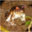

In [35]:
data[0]

In [36]:
X = np.array(data)
Y = np.array(labels_new)

In [37]:
X.shape

(50000, 32, 32, 3)

In [38]:
Y.shape

(50000,)

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [40]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000,) (10000,)


In [41]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building Neural Network**

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
num_of_classes = 10
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.compile(
    optimizer='Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [45]:
model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.2326 - loss: 2.1078 - val_acc: 0.3040 - val_loss: 1.8746
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3248 - loss: 1.8621 - val_acc: 0.3415 - val_loss: 1.8112
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3470 - loss: 1.8131 - val_acc: 0.3440 - val_loss: 1.8043
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3527 - loss: 1.7999 - val_acc: 0.3595 - val_loss: 1.7749
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3521 - loss: 1.7881 - val_acc: 0.3607 - val_loss: 1.7671
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3640 - loss: 1.7769 - val_acc: 0.3537 - val_loss: 1.7576
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3653 - loss: 1.7811 - val_acc: 0.3647 - val_loss: 1.7483
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3723 - loss: 1.7611 - val_acc: 0.3660 - val_loss: 1.7588
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

**ResNet50**

In [46]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers
from tensorflow.keras.applications.resnet50 import preprocess_input


In [47]:
convolutional_base = ResNet50(weights=None,include_top=False,input_shape=(256,256,3))

In [48]:
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [49]:
num_of_classes = 10
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))


In [50]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 438s 342ms/step - accuracy: 0.1384 - loss: 2.7216 - val_accuracy: 0.2410 - val_loss: 2.1648
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - accuracy: 0.1907 - loss: 2.4658 - val_accuracy: 0.3045 - val_loss: 1.9689
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - accuracy: 0.2399 - loss: 2.2452 - val_accuracy: 0.3562 - val_loss: 1.8497
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - accuracy: 0.2964 - loss: 2.0557 - val_accuracy: 0.4160 - val_loss: 1.6741
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - accuracy: 0.3327 - loss: 1.9272 - val_accuracy: 0.4397 - val_loss: 1.5771
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - accuracy: 0.3660 - loss: 1.8362 - val_accuracy: 0.4480 - val_loss: 1.5722
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - accuracy: 0.3960 - loss: 1.7275 - val_accuracy: 0.5015 - val_loss: 1.3899
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 387s 344ms/step - ac

In [52]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuray:',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 109ms/step - accuracy: 0.5909 - loss: 1.2124
Test Accuray: 0.5914000272750854


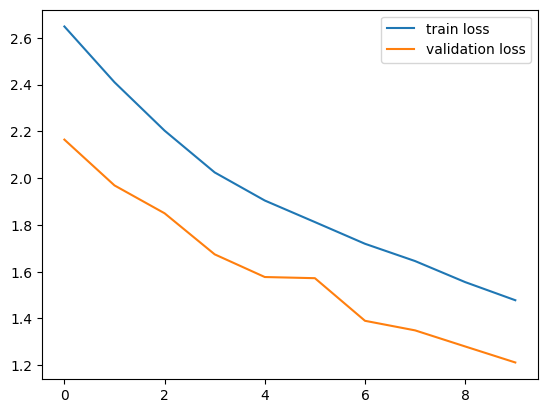

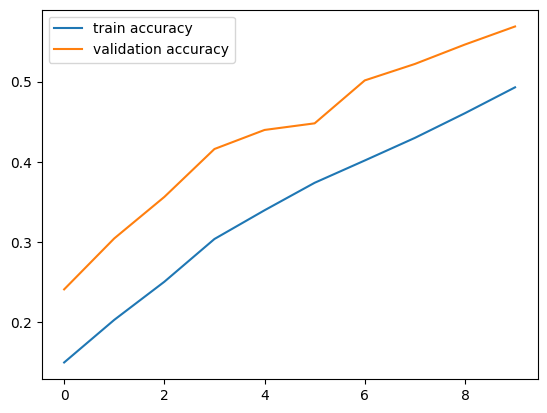

In [53]:
h = history
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()